# Pandas notes
### Based on the book _Pandas in action_ book

In [426]:
import pandas as pd
import numpy as np

### The reshape function of numpy

In [427]:
# Create a numpy array
a = np.array(range(0,12))
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

To convert _a_ to a 3X4 matrix...we use `reshape`

In [428]:
a.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [429]:
a = np.array(range(18))

In [430]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [431]:
b = a.reshape(3,2,3)
b

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]]])

In [432]:
b.reshape(18, ) # will flatten

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

### numpy nan

In [433]:
np.nan

nan

In [434]:
# Two Nulls or nan values are NOT treated as the same values
np.nan == np.nan

False

## Chapter - 1 Notes
* The `df.head()` and `df.tail()` can be used to display top 5 and bottom 5 rows. Use `df.head(n)` and `df.tail(n)` to display top _n_ or bottom _n_ rows of a DataFrame or Series object
* NOTE that these methods can be applied on both Series and also on DataFrame objects.

In [481]:
df = pd.DataFrame({'a': [1,2,3,4,5], 
                             'b': [10,20,30,40,50],
                             'c':['a','b','c','d','e']},
                             index=['row-1', 'row-2', 'row-3',
                             'row-4', 'row-5'])
df

,a,b,c
row-1,1,10,a
row-2,2,20,b
row-3,3,30,c
row-4,4,40,d
row-5,5,50,e


In [470]:
df

,a,b,c
row-1,1,10,a
row-2,12,20,b
row-3,3,30,c
row-4,14,40,d
row-5,5,50,e


In [435]:
# To read a CSV file
df = pd.read_csv("./datasets/pandas-in-action-master/Chapter 01 - Introducing Pandas/movies.csv")

In [436]:
# to print top 5 rows
df.head(5)

,Rank,Title,Studio,Gross,Year
0,1,Avengers: Endgame,Buena Vista,"$2,796.30",2019
1,2,Avatar,Fox,"$2,789.70",2009
2,3,Titanic,Paramount,"$2,187.50",1997
3,4,Star Wars: The Force Awakens,Buena Vista,"$2,068.20",2015
4,5,Avengers: Infinity War,Buena Vista,"$2,048.40",2018


In [437]:
df.head()

,Rank,Title,Studio,Gross,Year
0,1,Avengers: Endgame,Buena Vista,"$2,796.30",2019
1,2,Avatar,Fox,"$2,789.70",2009
2,3,Titanic,Paramount,"$2,187.50",1997
3,4,Star Wars: The Force Awakens,Buena Vista,"$2,068.20",2015
4,5,Avengers: Infinity War,Buena Vista,"$2,048.40",2018


In [438]:
##### To print bottom 5 rows (default)
df.tail()

,Rank,Title,Studio,Gross,Year
777,778,Yogi Bear,Warner Brothers,$201.60,2010
778,779,Garfield: The Movie,Fox,$200.80,2004
779,780,Cats & Dogs,Warner Brothers,$200.70,2001
780,781,The Hunt for Red October,Paramount,$200.50,1990
781,782,Valkyrie,MGM,$200.30,2008


### Notes
* Pandas uses one type of object (the DataFrame) to store multi-column datasets and another type of object (the Series) to store single-column datasets.
* Both Series and DataFrame objects have index. DataFrame object is nothing but a collection of Series objects.
* Index helps us to identify rows. 
* If NO column is supplied as index, then the default index will be numbers ranging from 0 to n-1 where n = # of rows
* An index can contain duplicate records.
* You can specify the column to be used as index. For example, to use _title_ as index, use `index_col` option of `pd.read_csv()`

In [489]:
df = pd.read_csv("./datasets/pandas-in-action-master/Chapter 01 - Introducing Pandas/movies.csv", index_col = 'Title')
df.head()

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
Avatar,2,Fox,"$2,789.70",2009
Titanic,3,Paramount,"$2,187.50",1997
Star Wars: The Force Awakens,4,Buena Vista,"$2,068.20",2015
Avengers: Infinity War,5,Buena Vista,"$2,048.40",2018


### Note
You can access index as any other column by addressing the index as `df.index`

In [490]:
# an index can have duplicate values
df[df.index.str.contains('101')]

,Rank,Studio,Gross,Year
Title,,,,
101 Dalmatians,425,Buena Vista,$320.70,1996
101 Dalmatians,708,Buena Vista,$215.90,1961


### Notes
* To get the data types of each column use `df.dtypes`
* To get the number of rows we have 2 methods:
    * `len(df)`
    * `df.shape`
* To get the dataset size (total number of cells
    * `df.size`
    * `df.shape[0] * df.shape[1]`

In [491]:
df.dtypes

Rank       int64
Studio    object
Gross     object
Year       int64
dtype: object

In [492]:
len(df)

782

In [493]:
df.shape

(782, 4)

In [494]:
df.shape[0]

782

In [495]:
df.size


3128

In [496]:
df.shape[0] * df.shape[1]


3128

### Notes about `iloc` and `loc` options
* To access a row in a data frame, you can use either the row number (begins with 0) or the row label value. 
* If you use the row number, you need to use the `iloc` else use the `loc` option
* In fact `iloc` is used to access any row or column based on the number or row or column (begins with 0) and `loc` is used to access any row or column based on the name/label
* You will get a Series object (when you access a single row). The index of the Series object will be the column names of the data frame.
* You can provide multiple ranges in the `iloc` option. For instance to access every other row (alternate row), you may use the expression `iloc[range(len(df))[::2]]`
* If you get more than one number in the `iloc` option you will get a DataFrame. If you get only one number inside the `iloc` option then you will get a Series object
* To access a row by an index label (not by the row number), use `iloc` option
* NOTE that we use `[]` brackets with `loc` and `iloc` options
* In general,
    * `df.iloc[[list elements corresponding to row numbers], [list elements corresponding to columns]]`
    * `df.loc[[list of row labels, can be the range of row labels after sorting], [list of columns]]`
    * `df.iloc[[list of elements corresponding to row numbers]]` will get the rows
    * `df.iloc[:,[list of elements corresponding to col numbers]]` will get the columns
    * `df.iloc[]` option will accept any indices (positive / negative indices), the way we slice the lists and strings

In [497]:
# To access the 4th row:
df.iloc[3]

Rank                4
Studio    Buena Vista
Gross      $2,068.20 
Year             2015
Name: Star Wars: The Force Awakens, dtype: object

In [498]:
# To access rows between 1 and 3 row numbers (NOT row labels)
df.iloc[1:4]

,Rank,Studio,Gross,Year
Title,,,,
Avatar,2,Fox,"$2,789.70",2009
Titanic,3,Paramount,"$2,187.50",1997
Star Wars: The Force Awakens,4,Buena Vista,"$2,068.20",2015


In [499]:
# Get alternate rows: 0, 2, 4 ...
df.iloc[::2]

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
Titanic,3,Paramount,"$2,187.50",1997
Avengers: Infinity War,5,Buena Vista,"$2,048.40",2018
Marvel's The Avengers,7,Buena Vista,"$1,518.80",2012
Avengers: Age of Ultron,9,Buena Vista,"$1,405.40",2015
...,...,...,...,...
Fun with Dick and Jane,773,Sony,$202.00,2005
Kindergarten Cop,775,Universal,$202.00,1990
21 Jump Street,777,Sony,$201.60,2012


In [500]:
# Access a row by the index or row label
df.loc['The Hunt for Red October']

Rank            781
Studio    Paramount
Gross      $200.50 
Year           1990
Name: The Hunt for Red October, dtype: object

In [501]:
# To access multiple rows by index or row labels
df.loc[['The Hunt for Red October', '21 Jump Street']]

,Rank,Studio,Gross,Year
Title,,,,
The Hunt for Red October,781,Paramount,$200.50,1990
21 Jump Street,777,Sony,$201.60,2012


In [503]:
# To access the 1st and 2nd columns
df.iloc[:,[0,1]]

,Rank,Studio
Title,,
Avengers: Endgame,1,Buena Vista
Avatar,2,Fox
Titanic,3,Paramount
Star Wars: The Force Awakens,4,Buena Vista
Avengers: Infinity War,5,Buena Vista
...,...,...
Yogi Bear,778,Warner Brothers
Garfield: The Movie,779,Fox
Cats & Dogs,780,Warner Brothers


In [37]:
# To access Ran and Studio columns:
df.loc[:,['Rank', 'Studio']]

,Rank,Studio
Title,,
Avengers: Endgame,1,Buena Vista
Avatar,2,Fox
Titanic,3,Paramount
Star Wars: The Force Awakens,4,Buena Vista
Avengers: Infinity War,5,Buena Vista
...,...,...
Yogi Bear,778,Warner Brothers
Garfield: The Movie,779,Fox
Cats & Dogs,780,Warner Brothers


### Note
* When you do not use `df.loc` and just provide the list of columns as `df[['a','b']]` then we will get another data frame containing the columns `a` and `b` of the data frame.
* If we do NOT provide the list, and access a column as `df['a']` then we will get only one column data and the return type will be a pandas Series. 
* To make the return value as a DataFrame, even though you access a single column, use a list, like this `df[['a']]`
* NOTE That it is applicable only when we do NOT use the `loc` or `iloc` options. If we use the `loc` then the behaviro changes. For example, if we use `df.loc[['a','b']]` then we will get the rows where the index labels are `a` or `b`.

In [39]:
# you may also use this to access specific columns
df[['Studio', 'Rank']]

,Studio,Rank
Title,,
Avengers: Endgame,Buena Vista,1
Avatar,Fox,2
Titanic,Paramount,3
Star Wars: The Force Awakens,Buena Vista,4
Avengers: Infinity War,Buena Vista,5
...,...,...
Yogi Bear,Warner Brothers,778
Garfield: The Movie,Fox,779
Cats & Dogs,Warner Brothers,780


In [40]:
# To access the row labels:Avengers: Endgame, Avatar, Titanic, and 
# To access the column labels: Studio and Rank
df.loc[['Avengers: Endgame', 'Avatar', 'Titanic'], ['Studio', 'Rank']]

,Studio,Rank
Title,,
Avengers: Endgame,Buena Vista,1
Avatar,Fox,2
Titanic,Paramount,3


In [41]:
df.loc[['Avengers: Endgame', 'Avatar', 'Titanic']]

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
Avatar,2,Fox,"$2,789.70",2009
Titanic,3,Paramount,"$2,187.50",1997


### Notes on `df.sort_values()`
* To sort a DataFrame use `df.sort_values(by=[...], ascending=[...])`
* Use `ascending=True/False` to control the sorting order
* Use `ascending=[True, False ...]` to control the sorting order on multiple columns


In [42]:
df.sort_values(by='Year', ascending = False).head()

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
John Wick: Chapter 3 - Parabellum,458,Lionsgate,$304.70,2019
The Wandering Earth,114,China Film Corporation,$699.80,2019
Toy Story 4,198,Buena Vista,$519.80,2019
How to Train Your Dragon: The Hidden World,199,Universal,$519.80,2019


In [43]:
# Sort on multiple columns
df.sort_values(by=["Year", "Studio"], ascending=[True, False]).head()

,Rank,Studio,Gross,Year
Title,,,,
Gone with the Wind,288,MGM,$402.40,1939
Bambi,540,RKO,$267.40,1942
101 Dalmatians,708,Buena Vista,$215.90,1961
The Jungle Book,755,Buena Vista,$205.80,1967
The Godfather,604,Paramount,$245.10,1972


### Notes on `df.sort_index()`

In [44]:
# Sort the values by index
df.sort_index(ascending=False)

,Rank,Studio,Gross,Year
Title,,,,
xXx: The Return of Xander Cage,385,Paramount,$346.10,2017
Zootopia,37,Buena Vista,"$1,023.80",2016
Your Name.,356,FUN,$358.00,2017
You've Got Mail,582,Warner Brothers,$250.80,1998
Yogi Bear,778,Warner Brothers,$201.60,2010
...,...,...,...,...
2012,93,Sony,$769.70,2009
2 Fast 2 Furious,632,Universal,$236.40,2003
101 Dalmatians,708,Buena Vista,$215.90,1961


### Note
You can use `df.reset_index()` to make the data frame's index as a column

In [505]:
df.reset_index()

,Title,Rank,Studio,Gross,Year
0,Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
1,Avatar,2,Fox,"$2,789.70",2009
2,Titanic,3,Paramount,"$2,187.50",1997
3,Star Wars: The Force Awakens,4,Buena Vista,"$2,068.20",2015
4,Avengers: Infinity War,5,Buena Vista,"$2,048.40",2018
...,...,...,...,...,...
777,Yogi Bear,778,Warner Brothers,$201.60,2010
778,Garfield: The Movie,779,Fox,$200.80,2004
779,Cats & Dogs,780,Warner Brothers,$200.70,2001
780,The Hunt for Red October,781,Paramount,$200.50,1990


### Notes on `value_counts()`
* Use `value_counts()` to count the values of a Series object
* Use `value_counts(normalize=True)` to normalize the counts (you will get proportion)
* Use `value_counts(dropna=False)` to count the number of nulls in the Series or a DataFrames's column

In [509]:
df['Studio'].value_counts().sort_values(ascending=False).head(10)

Warner Brothers    132
Buena Vista        125
Fox                117
Universal          109
Sony                86
Paramount           76
Dreamworks          27
Lionsgate           21
New Line            16
MGM                 11
Name: Studio, dtype: int64

In [510]:
df['Studio'].value_counts(normalize=True).sort_values(ascending=False).head(10)

Warner Brothers    0.168798
Buena Vista        0.159847
Fox                0.149616
Universal          0.139386
Sony               0.109974
Paramount          0.097187
Dreamworks         0.034527
Lionsgate          0.026854
New Line           0.020460
MGM                0.014066
Name: Studio, dtype: float64

### Notes on filtering
* We can filter rows using several conditions.
* Simple Conditions can be combined to form complex conditions using bitwise operators: `&, |, ~` and brackets.
* `&` is for _AND_, `|` is for _OR_ and `~` is for _NOT_
* To combine multiple conditions use _()_


In [511]:
# Get the rows belonging to the year 1999
df[df["Year"] == 1999].head()

,Rank,Studio,Gross,Year
Title,,,,
Star Wars: Episode I - The Phantom Menace,35,Fox,"$1,027.00",1999
The Sixth Sense,122,Buena Vista,$672.80,1999
Toy Story 2,207,Buena Vista,$497.40,1999
The Matrix,233,Warner Brothers,$463.50,1999
Tarzan,246,Buena Vista,$448.20,1999


### Notes
* Modifying all the records of a column. 

In [58]:
# Get the rows whose gross is > 500 in the Year 2000
# Since the Gross is a character data, eliminate the "$" and ","
# We will learn about str functions later
df["Gross"] = df["Gross"].str.replace("$","").str.replace(",","").astype(float)

In [59]:
df.head()

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,2796.3,2019
Avatar,2,Fox,2789.7,2009
Titanic,3,Paramount,2187.5,1997
Star Wars: The Force Awakens,4,Buena Vista,2068.2,2015
Avengers: Infinity War,5,Buena Vista,2048.4,2018


In [60]:
# Create a named condition
gross_gt_500_year_eq_2000 = (df["Gross"] > 500) & (df["Year"] == 2000)

# Apply the condition
df[gross_gt_500_year_eq_2000]

,Rank,Studio,Gross,Year
Title,,,,
Mission: Impossible II,175,Paramount,546.4,2000


In [61]:
# Get rows that belong to the year 2015 and not to "Fox"
year_eq_2015_and_stidio_not_fox = (df["Year"] == 2015) & (df["Studio"] != "Fox")
df[year_eq_2015_and_stidio_not_fox].head()

,Rank,Studio,Gross,Year
Title,,,,
Star Wars: The Force Awakens,4,Buena Vista,2068.2,2015
Jurassic World,6,Universal,1671.7,2015
Furious 7,8,Universal,1516.0,2015
Avengers: Age of Ultron,9,Buena Vista,1405.4,2015
Minions,19,Universal,1159.4,2015


### Important observation
* If you provide a list of values (ex: `df[['a', 'b']]`) then you will get a DataFrame with only columns `a` and `b`
* If you provide a list of True/False values, then those values are used to qualify the rows. Example: `df[[True, False ...]`. NOTE that the list of True/False values must be of the same length as the number of rows in the data frame.
* I think if we use `loc` or `iloc` option, then we can supply True/False list for both columns and also for rows.
* Also it is **VERY IMPORTANT** to remember that to selectively update the values of a column, you MUST use `loc` or `iloc` options only (more on this later...).
* Although it looks complex, it's better to always use `loc` or `iloc` ways of accessing the columns and updating them.
* For selective updates to a column, always use `iloc` or `loc` options. For example, if you want to update the values of year 1999 to 2040, use: `df.loc[df['year'] == 1999,'year'] = 2040`

In [512]:
a = pd.DataFrame({'a':[1,2,3], 'b':[10,20,30]})
a

,a,b
0,1,10
1,2,20
2,3,30


In [513]:
# Here is is applied only on rows
a[[True, False, True]]

,a,b
0,1,10
2,3,30


In [515]:
# Here also it is applied on rows
a.loc[[True, True, False]]

,a,b
0,1,10
1,2,20


In [516]:
# Here it is applied on both rows and columns
a.loc[[True, True, False],[True, False]]

,a
0,1
1,2


In [517]:
# Applied on columns only
a.loc[:,[True,False]]

,a
0,1
1,2
2,3


In [80]:
a.loc[:,'a']

0    1
1    2
2    3
Name: a, dtype: int64

In [82]:
a

,a,b
0,1,10
1,2,20
2,3,30


#### IMPORTANT EXAMPLE
Selective update. Updating the value of b to -20, wherever we have the value of a is 2

In [87]:
# Updating the value of b to -20, wherever we have the value of a is 2
a.loc[a['a'] == 2, 'b'] = -20
a

,a,b
0,1,10
1,2,-20
2,3,30


### Applying `str` functions
* You can apply any `str` function using the `df['col_name'].str` method. 
* The `df['col_name'].str` will give another Series object. 
* To apply subsequet `str` functions, you need to use multiple `str`. Example: `df['col_name'].str.lower().str.contains('dark')`
* `str` can also be applied on `index`


In [81]:
# Fetch all the rows that contain 'dark as the movie title'
dark_titled_movies = df.index.str.lower().str.contains('dark')
df[dark_titled_movies]

,Rank,Studio,Gross,Year
Title,,,,
Transformers: Dark of the Moon,23,Paramount,1123.8,2011
The Dark Knight Rises,27,Warner Brothers,1084.9,2012
The Dark Knight,39,Warner Brothers,1004.9,2008
Thor: The Dark World,132,Buena Vista,644.6,2013
Star Trek Into Darkness,232,Paramount,467.4,2013
Fifty Shades Darker,309,Universal,381.5,2017
Dark Shadows,600,Warner Brothers,245.5,2012
Dark Phoenix,603,Fox,245.1,2019


### Notes on `groupby`
* Use `groupby()` method on the DataFrame to group the data based on a column
* You can apply an `agg` method on the `groupby` to get aggregated data
* It will return a Series object
* You can group by multiple columns and apply multiple aggregate functions on each column.


In [99]:
df_grouped = df.groupby("Studio").agg({'Gross':['sum', "count", "mean", np.median, np.std]})
df_grouped.head()

Gross                                 
                            sum count    mean median         std
Studio                                                          
Artisan                   248.6     1  248.60  248.6         NaN
Buena Vista             73585.0   125  588.68  449.2  427.861435
CL                        228.1     1  228.10  228.1         NaN
China Film Corporation    699.8     1  699.80  699.8         NaN
Columbia                 1276.6     5  255.32  243.2   43.431981

### OBSERVE
* The columns are grouped. They have 2 levels. It's a multi level column. See below:

In [100]:
df_grouped.columns

MultiIndex([('Gross',    'sum'),
            ('Gross',  'count'),
            ('Gross',   'mean'),
            ('Gross', 'median'),
            ('Gross',    'std')],
           )

To drop level 0

In [102]:
df_grouped.columns.droplevel(0)

Index(['sum', 'count', 'mean', 'median', 'std'], dtype='object')

Set the column names after dropping level 0

In [103]:
df_grouped.columns = df_grouped.columns.droplevel(0)
df_grouped.head()

,sum,count,mean,median,std
Studio,,,,,
Artisan,248.6,1,248.60,248.6,NaN
Buena Vista,73585.0,125,588.68,449.2,427.861435
CL,228.1,1,228.10,228.1,NaN
China Film Corporation,699.8,1,699.80,699.8,NaN
Columbia,1276.6,5,255.32,243.2,43.431981


## Chapter 2 Notes (Series object)

The Series is one of two primary data structures available in pandas. It is a one-dimensional labelled array for storing **homogenous** data. An array is simply an ordered collection of values, analogous to a Python list. The term "homogenous" means that the values are of the same data type.

Each element in the Series object can be accessed using the position of the element (starting with 0) or by a label. 

A Series combines and expands upon the best features of Python’s native data structures. Like a `list`, a `Series` holds its values in a sequenced order. Like a `dictionary`, each value is accessed by a key or label.

Multidimensional pandas data structures like the `DataFrame` are composed of one or more `Series` objects joined together.

* To declare a Series object use: `pd.Series()`
* To create a Series object with a `list` of values use `pd.Series(<list_obj>)`
    Example: `pd.Series([1,2,3,4])` will create a Series object with index labels as `[0, 1, 2, 3, 4]`
* The order of the elements in the input list is preserved    
* To append a value to a Series object, you can use `append`. But the value must be a Series object.
    Example: 
```
s = pd.Series([1,2,3,4])
s = s.append(pd.Series(5))
# The index of s will be [0, 1, 2, 3, 0] for [1, 2, 3, 4, 5] values
# To make the index as [0, 1, 2, 3, 4], use ignore_index option of append
```
* To drop an element at index use `s.drop(index)`
* To drop elements at given index locations, use `s.drop([list of indices])`
    Example:
```
s = pd.Series(range(10))
# Drop the last element:
s.drop(s.index[-1])
# Drop the first element:
s.drop(s.index[0])
# Drop the elements which are >= 5
s_gt_eq_5_index = (s >= 5).index
s.drop(s_gt_eq_5_index)
```    

In [122]:
s = pd.Series(range(10))
print(s)
# Drop the last element:
s = s.drop(s.index[-1])
print(f"After dropping the last element: {s}")
# Drop the first element:
s = s.drop(s.index[0])
print(f"After dropping the first element: {s}")

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
After dropping the last element: 0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
dtype: int64
After dropping the first element: 1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
dtype: int64


In [126]:
# Drop the elements which are >= 5
s_gt_eq_5_index = s[s >= 5].index
s = s.drop(s_gt_eq_5_index)
print(f"After dropping the elements >= 5: {s}")

After dropping the elements >= 5: 1    1
2    2
3    3
4    4
dtype: int64


In [127]:
# NOT sure why the authour said homogenous data in the Series
# You can see below that we are storing integers and strings
a = [1,2,'sekhar']
type(pd.Series(a)[2])

str

In [128]:
type(pd.Series(a)[0])

int

### Notes
In a new cell, write out `pd.Series()`, then place the mouse cursor in between the parentheses, and press the `Shift + Tab` keys. A small modal with documentation will appear. Each additional press of the two keys will reveal more information.

In [196]:
pd.Series(1)

0    1
dtype: int64

### Customizing the index
Example:
We have 2 arrays:
```
food = ['Burger', 'Pizza', 'Pasta', 'Rice', 'Spagetti']
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
```

Then you can create a `Series` object with index as `day` and values as `food`

In [129]:
food = ['Burger', 'Pizza', 'Pasta', 'Rice', 'Spagetti']
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
s = pd.Series(food, index=day)
s

Monday         Burger
Tuesday         Pizza
Wednesday       Pasta
Thursday         Rice
Friday       Spagetti
dtype: object

You can access the index as `s.index`

In [130]:
s.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], dtype='object')

You can also reset your index to any list of values

In [131]:
s.index = range(len(s))
s

0      Burger
1       Pizza
2       Pasta
3        Rice
4    Spagetti
dtype: object

### To get the values of a Series object

To access the values only, use `s.values`

In [132]:
s.values

array(['Burger', 'Pizza', 'Pasta', 'Rice', 'Spagetti'], dtype=object)

To convert the values to a list of values

In [133]:
list(s.values)

['Burger', 'Pizza', 'Pasta', 'Rice', 'Spagetti']

### To get the index values

In [134]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [135]:
list(s.index)

[0, 1, 2, 3, 4]

### Series object with missing values
Use `np.nan` to represent Null or missing values

In [136]:
l = [1,2,3, np.nan, 5]
s = pd.Series(l)
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

### To check missing values

In [137]:
s.isnull()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [138]:
# To replace Null values with another value
s[s.isnull()] = np.mean(s)

In [139]:
s

0    1.00
1    2.00
2    3.00
3    2.75
4    5.00
dtype: float64

In [140]:
# You can also use fillna()
s = pd.Series(l)
s.fillna(np.mean(s), inplace=True)
s

0    1.00
1    2.00
2    3.00
3    2.75
4    5.00
dtype: float64

### Check if the Series object contains all unique values

In [141]:
s

0    1.00
1    2.00
2    3.00
3    2.75
4    5.00
dtype: float64

In [142]:
s.is_unique

True

In [143]:
s[0]

1.0

### Create a Series object with a dict

In [144]:
d = {'a':1,'b':2,'c':3,'d':4}
s = pd.Series(d)
s

a    1
b    2
c    3
d    4
dtype: int64

### Retrieving the first and last rows of a Series
* With series also we can use `loc` and `iloc` to access the values by row labels or by row index.
* `s[<label>]` will give you the element at the row label `<label>`
* `s.iloc[0]` will get the first value in the Series
* `s.iloc[-1]` will get the last value in the Series
* `s.iloc[-1:-5:-1]` will get the last 4 values in reverse order
* `s.iloc[-4:]` will get the last 4 values
* You can also use `head()` and `tail()` functions on the Series objects

In [233]:
food = ['Burger', 'Pizza', 'Pasta', 'Rice', 'Spagetti', 'Soup', 'Fish']
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
s = pd.Series(food, index=day)
s

Monday         Burger
Tuesday         Pizza
Wednesday       Pasta
Thursday         Rice
Friday       Spagetti
Saturday         Soup
Sunday           Fish
dtype: object

In [235]:
# Get the last 3 elements in reverse order
s.iloc[-1:-4:-1]

Sunday          Fish
Saturday        Soup
Friday      Spagetti
dtype: object

In [238]:
s.iloc[-4:]

Thursday        Rice
Friday      Spagetti
Saturday        Soup
Sunday          Fish
dtype: object

In [239]:
# access a value by row label
s['Monday']

'Burger'

In [247]:
# To access multiple values via row label
# Based on the row label order the elements are ordered
s.loc[['Tuesday','Monday']]

Tuesday     Pizza
Monday     Burger
dtype: object

In [248]:
s.head()

Monday         Burger
Tuesday         Pizza
Wednesday       Pasta
Thursday         Rice
Friday       Spagetti
dtype: object

In [249]:
s.tail(2)

Saturday    Soup
Sunday      Fish
dtype: object

### Mathematical operations on Series
* Use `s.sum()` to sum the values of a Series
* Use `s.product()` to multiply the values of a Series
* Use `s.cumsum()` to get the cumulative sum of the elements of a Series
* Use `s.pct_change()` to get the percentage change of elements (consecutive)
* Use `s.mean()` to get the mean of the elements
* By default the np.nan values are ignored. To consider them use `skipna=False` option
* Use `s.min()` to get the minimum element
* Use `s.max()` to get the maximum element
* Use `s.dropna()` to drop the null values
* My note: To get the index of elements where we have min or max or nan values, use something like the following:
```
list(s.index[s.isnull()]) # Get the indices wherever we have null values
list(s.index[s == s.min()]) # Get the indices wherever we have min values
list(s.index[s == s.max()]) # Get the indices wherever we have max values
```
* Use `s.unique()` to get unique values from a Series

* To generate a set of random integers use `np.random.choice()`. It has both the `replacement=True` and `replacement=False` options.
* You may also use `np.random.randint()`, but I think it does not have option to generate values without replacement.
* To generate a set of random values between `[0,1)` use `np.random.random(n)`
* You can use `s.sample()` to generate samples with/without replacement from a series object


In [520]:
a = np.random.randint(low = 1, high = 10, size=20)
a

array([4, 8, 1, 4, 1, 4, 1, 6, 2, 2, 4, 9, 2, 7, 2, 4, 7, 2, 2, 4])

In [160]:
np.random.random(10000)

array([0.36964867, 0.23009289, 0.54067653, ..., 0.29218497, 0.31663808,
       0.90801839])

In [164]:
s.sample(10, replace=True)

d    4
d    4
d    4
a    1
c    3
c    3
d    4
a    1
d    4
c    3
dtype: int64

In [167]:
np.random.choice(range(10), 100, replace=True)

array([7, 9, 6, 5, 0, 5, 1, 2, 5, 4, 9, 0, 1, 5, 3, 8, 3, 6, 3, 3, 1, 0,
       2, 0, 5, 5, 7, 5, 9, 0, 2, 2, 0, 5, 7, 7, 7, 8, 5, 6, 4, 2, 6, 7,
       1, 0, 8, 4, 6, 2, 7, 7, 9, 0, 5, 7, 4, 6, 4, 0, 4, 5, 0, 2, 5, 2,
       8, 7, 4, 8, 3, 5, 9, 4, 1, 9, 0, 9, 0, 7, 3, 3, 0, 8, 2, 1, 2, 6,
       1, 3, 9, 4, 1, 8, 4, 3, 7, 2, 6, 7])

In [168]:
s = pd.Series(a)
s

0     6
1     5
2     4
3     2
4     6
5     3
6     9
7     1
8     6
9     8
10    7
11    4
12    5
13    2
14    7
15    4
16    5
17    7
18    5
19    3
dtype: int64

In [169]:
# Put some NULL values
s.iloc[[1,4,6, -1]] = np.nan
s

0     6.0
1     NaN
2     4.0
3     2.0
4     NaN
5     3.0
6     NaN
7     1.0
8     6.0
9     8.0
10    7.0
11    4.0
12    5.0
13    2.0
14    7.0
15    4.0
16    5.0
17    7.0
18    5.0
19    NaN
dtype: float64

In [275]:
# Get the sum of all values
s.sum()

74.0

In [276]:
# Get the product
s.iloc[0:5].product()

24.0

In [277]:
# Get the % change. Nans are replaced by the previous values
s.pct_change()

0          NaN
1     0.000000
2     1.000000
3    -0.250000
4     0.000000
5     1.333333
6     0.000000
7    -0.142857
8    -0.500000
9     1.666667
10   -0.375000
11    0.000000
12    0.200000
13   -0.333333
14    1.000000
15   -0.625000
16   -0.333333
17    1.500000
18   -0.400000
19    0.000000
dtype: float64

In [278]:
# average
s.mean()

4.625

In [279]:
# Minimum value
s.min()

2.0

In [280]:
# Get the indices where we have minimum values
list(s.index[s == s.min()])

[0, 16]

In [266]:
# Get the index locations wherever we have null values
list(s.index[s.isnull()])

[1, 4, 6, 19]

In [281]:
# Drop the nulls. This will not reset the index
s.dropna()

0     2.0
2     4.0
3     3.0
5     7.0
7     6.0
8     3.0
9     8.0
10    5.0
11    5.0
12    6.0
13    4.0
14    8.0
15    3.0
16    2.0
17    5.0
18    3.0
dtype: float64

In [282]:
s.dropna().reset_index(drop=True)

0     2.0
1     4.0
2     3.0
3     7.0
4     6.0
5     3.0
6     8.0
7     5.0
8     5.0
9     6.0
10    4.0
11    8.0
12    3.0
13    2.0
14    5.0
15    3.0
dtype: float64

In [283]:
# cumulative sum. Nulls are ignored by default
s.cumsum()

0      2.0
1      NaN
2      6.0
3      9.0
4      NaN
5     16.0
6      NaN
7     22.0
8     25.0
9     33.0
10    38.0
11    43.0
12    49.0
13    53.0
14    61.0
15    64.0
16    66.0
17    71.0
18    74.0
19     NaN
dtype: float64

In [273]:
s

0     2.0
1     NaN
2     4.0
3     3.0
4     NaN
5     7.0
6     NaN
7     6.0
8     3.0
9     8.0
10    5.0
11    5.0
12    6.0
13    4.0
14    8.0
15    3.0
16    2.0
17    5.0
18    3.0
19    NaN
dtype: float64

### `s.describe()`
Shows the summary stats on numeric Series object. It can also be applied on character data.

In [170]:
s.describe()

count    16.00000
mean      4.75000
std       2.04939
min       1.00000
25%       3.75000
50%       5.00000
75%       6.25000
max       8.00000
dtype: float64

In [171]:
a = pd.Series(['a', 'b','c','a','b', None, np.nan])
a.describe()

count     5
unique    3
top       a
freq      2
dtype: object

In [172]:
a.unique()

array(['a', 'b', 'c', None, nan], dtype=object)

### Arithmetic operations
* You can apply standard arithmetic operations like `+, -, *, /, //, **, %` on series object

In [173]:
# Square all elements of the series
s**2

0     36.0
1      NaN
2     16.0
3      4.0
4      NaN
5      9.0
6      NaN
7      1.0
8     36.0
9     64.0
10    49.0
11    16.0
12    25.0
13     4.0
14    49.0
15    16.0
16    25.0
17    49.0
18    25.0
19     NaN
dtype: float64

In [174]:
# Add 30 to all elements of series object
s+30

0     36.0
1      NaN
2     34.0
3     32.0
4      NaN
5     33.0
6      NaN
7     31.0
8     36.0
9     38.0
10    37.0
11    34.0
12    35.0
13    32.0
14    37.0
15    34.0
16    35.0
17    37.0
18    35.0
19     NaN
dtype: float64

### Broadcasting
* You can apply `+, - *, /, //, %, **` on 2 Series objects. The operations are applied based on the row index.
* Since an index can contain duplicate values, the elements are cross producted wherever there is a matching value in the index. 
* You can also apply `==, !=`, but the series objects must be identically labeled

In [313]:
a1 = pd.Series(data=[1,2,3,4,5,6,7,8,9,10], index = ['a','b','c','d','a','b','c','d','a','b'])
a2 = pd.Series(data=[10,20,30,40,50,60,70,80,90,100], index = ['a','b','c','d','e','f','g','h','a','b'])
a2//a1
# Observe that we got 6 values for 'a' in the index, since we have 3 'a's in a1 and 2 'a's in a2

a    10.0
a     2.0
a     1.0
a    90.0
a    18.0
a    10.0
b    10.0
b     3.0
b     2.0
b    50.0
b    16.0
b    10.0
c    10.0
c     4.0
d    10.0
d     5.0
e     NaN
f     NaN
g     NaN
h     NaN
dtype: float64

In [176]:
# You can apply this kind of comparison only if the series objects are identically labeled
a1 = pd.Series(data=[1,2,3,4])
a2 = pd.Series(data=[1,20,1,4])
a1 == a2

0     True
1    False
2    False
3     True
dtype: bool

### Converting a Series object to a dict
* Use `dict(s)`. The index labels will be the keys and the values will be the Series object values
* To get the series object values use `s.values`
* To get the series object index use `s.index`
* To convert a Series obj to list use `list(s)`

In [177]:
dict(a1)

{0: 1, 1: 2, 2: 3, 3: 4}

In [178]:
list(a1)

[1, 2, 3, 4]

In [179]:
s = [np.nan, np.nan]
len(s)

2

### Chapter-2 (Series object)
#### Exercises

**Q. Declare a colors list with 4 strings representing your favorite colors. Instantiate a Series object with the values from the colors list.**

In [180]:
colors = ['Red', 'Green', 'Blue', 'Yellow']
s = pd.Series(colors)
s

0       Red
1     Green
2      Blue
3    Yellow
dtype: object

In [181]:
colors = ['Red', 'Green', 'Blue', 'Yellow']
s = pd.Series(data = [1,2,3,4], index = colors)
s

Red       1
Green     2
Blue      3
Yellow    4
dtype: int64

## Chapter-3 
### Series Methods

* To check if a Series object has at least one NaN values, use `s.hanans`

In [182]:
s.hasnans

False

In [183]:
pd.Series(list(s) + [np.nan]).hasnans

True

In [184]:
pd.Series(list(s) + [None]).hasnans

True

### Read some files

In [521]:
pokemon = pd.read_csv("./datasets/pandas-in-action-master/Chapter 03 - Series Methods/pokemon.csv")

In [186]:
pokemon

,Pokemon,Type
0,Bulbasaur,Grass / Poison
1,Ivysaur,Grass / Poison
2,Venusaur,Grass / Poison
3,Charmander,Fire
4,Charmeleon,Fire
...,...,...
804,Stakataka,Rock / Steel
805,Blacephalon,Fire / Ghost
806,Zeraora,Electric
807,Meltan,Steel


In [522]:
google_stocks = pd.read_csv("./datasets/pandas-in-action-master/Chapter 03 - Series Methods/google_stocks.csv")
google_stocks

,Date,Close
0,2004-08-19,49.98
1,2004-08-20,53.95
2,2004-08-23,54.50
3,2004-08-24,52.24
4,2004-08-25,52.80
...,...,...
3819,2019-10-21,1246.15
3820,2019-10-22,1242.80
3821,2019-10-23,1259.13
3822,2019-10-24,1260.99


### Notes
* Observe that the `pd.read_csv()` will read the data to a DataFrame
* If you want to read a file that has 2 columns, and make the first column as Series row labels, and the second column as the values of the Series, use `squeeze=True` option. If you have more than 2 cols, then `squeeze=True` option will not have any effect. You will get a DataFrame.

In [188]:
google_stocks = pd.read_csv("./datasets/pandas-in-action-master/Chapter 03 - Series Methods/google_stocks.csv",
                           squeeze=True, index_col='Date')
google_stocks

Date
2004-08-19      49.98
2004-08-20      53.95
2004-08-23      54.50
2004-08-24      52.24
2004-08-25      52.80
               ...   
2019-10-21    1246.15
2019-10-22    1242.80
2019-10-23    1259.13
2019-10-24    1260.99
2019-10-25    1265.13
Name: Close, Length: 3824, dtype: float64

In [189]:
google_stocks.index.hasnans

False

In [190]:
google_stocks.hasnans

False

In [523]:
# Although you used squeeze=True option, you still get a DataFrame.
revolutionary_war = pd.read_csv("./datasets/pandas-in-action-master/Chapter 03 - Series Methods/revolutionary_war.csv",
                           squeeze=True, index_col = 'Start Date')

In [524]:
revolutionary_war

,Battle,State
Start Date,,
9/1/1774,Powder Alarm,Massachusetts
12/14/1774,Storming of Fort William and Mary,New Hampshire
4/19/1775,Battles of Lexington and Concord,Massachusetts
4/19/1775,Siege of Boston,Massachusetts
4/20/1775,Gunpowder Incident,Virginia
...,...,...
9/11/1782,Siege of Fort Henry,Virginia
9/13/1782,Grand Assault on Gibraltar,NaN
10/18/1782,Action of 18 October 1782,NaN


### `parse_dates` option of `pd.read_csv()`
We can use `parse_dates` option of `pd.read_csv()` to parse the date columns automatically. But sometimes this may not work, in which case you need to use some date time functions to parse the date columns as dates.

In [525]:
revolutionary_war = pd.read_csv("./datasets/pandas-in-action-master/Chapter 03 - Series Methods/revolutionary_war.csv",
                           parse_dates = ['Start Date'], squeeze=True, index_col = 'Start Date')
revolutionary_war

,Battle,State
Start Date,,
1774-09-01,Powder Alarm,Massachusetts
1774-12-14,Storming of Fort William and Mary,New Hampshire
1775-04-19,Battles of Lexington and Concord,Massachusetts
1775-04-19,Siege of Boston,Massachusetts
1775-04-20,Gunpowder Incident,Virginia
...,...,...
1782-09-11,Siege of Fort Henry,Virginia
1782-09-13,Grand Assault on Gibraltar,NaN
1782-10-18,Action of 18 October 1782,NaN


### Applying a function on each value of a Series using the `s.apply` 
We can use `s.apply()` method to apply a function on each value of a Series.
For example, we want to check the presence of a "/" in the Pokemon Series, and if the "/" is present then declare the value as "multi", else declare it as single.

In [194]:
pokemon.head()

,Pokemon,Type
0,Bulbasaur,Grass / Poison
1,Ivysaur,Grass / Poison
2,Venusaur,Grass / Poison
3,Charmander,Fire
4,Charmeleon,Fire


In [195]:
def check_single_multi(types):
    if "/" in types: 
        return "Multi"
    else:
        return "Single"

In [196]:
pokemon["Type"].apply(check_single_multi)

0       Multi
1       Multi
2       Multi
3      Single
4      Single
        ...  
804     Multi
805     Multi
806    Single
807    Single
808    Single
Name: Type, Length: 809, dtype: object

### Note
* *My Note*: To pass a parameter to the function being applied, we can use this technique.

In [197]:
# Write a function that takes a string and a value, and returns "Yes" if the string begins with the value
# else it returns "No"
def init_string(x, v):
    if x.startswith(v):
        return "Yes"
    else:
        return "No"

# To apply init_string() with v = 'B'    
pokemon["Pokemon"].apply(lambda x: init_string(x, 'B'))    

0      Yes
1       No
2       No
3       No
4       No
      ... 
804     No
805    Yes
806     No
807     No
808     No
Name: Pokemon, Length: 809, dtype: object

In [198]:
# To apply init_string() with v = 'C'    
pokemon["Pokemon"].apply(lambda x: init_string(x, 'C'))    

0       No
1       No
2       No
3      Yes
4      Yes
      ... 
804     No
805     No
806     No
807     No
808     No
Name: Pokemon, Length: 809, dtype: object

### `value_counts()` gets the frequency of each level in a categorical variable
* Using `normalize=True` will normalize the values

In [199]:
pokemon["Pokemon"].apply(lambda x: init_string(x, 'C')).value_counts()    

No     746
Yes     63
Name: Pokemon, dtype: int64

In [200]:
pokemon["Pokemon"].apply(lambda x: init_string(x, 'C')).value_counts(normalize=True)   

No     0.922126
Yes    0.077874
Name: Pokemon, dtype: float64

### Exercise
Our goal is to find out which day of the week saw the most battles during the Revolutionary War. The final output should be a Series with the days of the week (i.e. Sunday, Monday) as index labels and a count of battles on each day as the values.

In [201]:
# To get the day of a date:
from datetime import datetime 
today = datetime.now()
today.strftime("%A")

'Wednesday'

In [202]:
revolutionary_war.head()

,Battle,State
Start Date,,
1774-09-01,Powder Alarm,Massachusetts
1774-12-14,Storming of Fort William and Mary,New Hampshire
1775-04-19,Battles of Lexington and Concord,Massachusetts
1775-04-19,Siege of Boston,Massachusetts
1775-04-20,Gunpowder Incident,Virginia


In [203]:
def get_weekday(x):
        return x.strftime("%A")

In [204]:
dates = pd.Series(revolutionary_war.index)
dates.apply(get_weekday)

ValueError: NaTType does not support strftime

In [205]:
# We have Nulls in the dates. Lets drop them and apply the get_weekday() function
dates.dropna().apply(get_weekday).value_counts(normalize=True)

Friday       0.171053
Saturday     0.171053
Wednesday    0.140351
Thursday     0.135965
Sunday       0.135965
Tuesday      0.127193
Monday       0.118421
Name: Start Date, dtype: float64

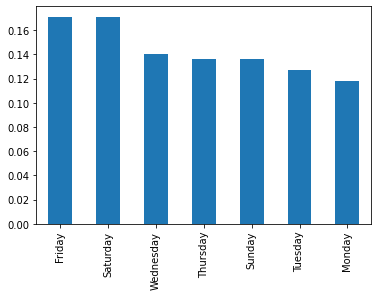

In [206]:
## We can conclude that most of the revolutions have occurred on Friday or Saturday
import matplotlib
import matplotlib.pyplot as plt
dates.dropna().apply(get_weekday).value_counts(normalize=True).plot(kind="bar")
plt.show()

## Chapter-4 (The Dataframe Object)
* You can create a DataFrame using a dictionary. Each key in the dictionary will be single element (like a string), and the values for each key will be a list of values. The lists of each key MUST be of the same length.

In [529]:
# Creating a dataframe from a dictionary
d = {'a':[1,2,3,4],
    'b': [10,20, 30, 40]}
df = pd.DataFrame(d, index = range(1,5))
print(df)

# Add a new column to df
df['c'] = [100,200,300,400]
df

   a   b
1  1  10
2  2  20
3  3  30
4  4  40


,a,b,c
1,1,10,100
2,2,20,200
3,3,30,300
4,4,40,400


* **My NOTE**: You can create a DataFrame using Series objects. See the below example. NOTE that the series elements are aligned by the keys of the series objects. In the below example, since we have matching indices for the values `30, 40, 50`, 

When we created a DataFrame and assigned the first column using the following statements:
```
a1 = pd.Series([1,2,3,4,5], index = [10,20,30,40,50])
df = pd.DataFrame()
df['a1'] = a1
```

The index of the `df` will have the index same as the `a1` series. The index of the `df` is fixed now. If you add new Series as a new column to `df`, then wherever we have a matching index in the new Series, the elements are added. If there is an index value in `df` but not in new series, the new column will have a NaN value. If the index is present in new Series, but not in `df` then the `df`'s new column does not have that value.

In [208]:
a1 = pd.Series([1,2,3,4,5], index = [10,20,30,40,50])
a2 = pd.Series([-1,-2,-3,-4,-5], index = [1,2,30,40,50])

df = pd.DataFrame()
# The index of a1 will become the index of df
df['a1'] = a1

# If there is an index value in df but not in a2, then the new col will have NaN.
# If there is an index value in a2, but not in df, then those values are ignored
# If there is a matching index value in both df and a2, then that value is added
df['a2'] = a2
df.head()

,a1,a2
10,1,NaN
20,2,NaN
30,3,-3.0
40,4,-4.0
50,5,-5.0


### Get the data types of all columns
* Use `df.dtypes`

In [209]:
df.dtypes

a1      int64
a2    float64
dtype: object

In [210]:
# Get the counts of each data type
df.dtypes.value_counts()

float64    1
int64      1
dtype: int64

### Get the values of a DataFrame
* Use `df.values`. You will get a Numpy Array
* 

In [211]:
df.values

array([[ 1., nan],
       [ 2., nan],
       [ 3., -3.],
       [ 4., -4.],
       [ 5., -5.]])

In [216]:
df

,a1,a2
10,1,NaN
20,2,NaN
30,3,-3.0
40,4,-4.0
50,5,-5.0


### Get the column names and index names
* `df.columns` will get the list of column names
* `df.index` will get the index values

In [217]:
print(df.columns)
print(df.index)

Index(['a1', 'a2'], dtype='object')
Int64Index([10, 20, 30, 40, 50], dtype='int64')


### Get the counts of elements (ignoring the nulls) in each column

In [218]:
# Observe that a2 has only 3 non-nulls
df.count()

a1    5
a2    3
dtype: int64

In [219]:
df.shape

(5, 2)

### Display top/bottom _n_ rows 

In [220]:
df.head(3)

,a1,a2
10,1,NaN
20,2,NaN
30,3,-3.0


In [221]:
df.tail(3)

,a1,a2
30,3,-3.0
40,4,-4.0
50,5,-5.0


### Sample rows of a DataFrame
* Use `df.sample()` method. 
* Default is sample without replacement
* You can use sampling with replacement by using `replace=True`

In [222]:
df.sample(20, replace=True)

,a1,a2
50,5,-5.0
10,1,NaN
50,5,-5.0
20,2,NaN
50,5,-5.0
20,2,NaN
30,3,-3.0
10,1,NaN
30,3,-3.0
20,2,NaN


### Get n Largest/Smallest elements (based on a column)
* Example: `df.nlargest(n=10, columns="Birthday")` will get the top 10 rows after ordering the data by birthday in descending order

* Example: `df.nsmallest(n=10, columns="Birthday")` will get the top 10 rows after ordering the data by birthday in ascending order


In [223]:
nba = pd.read_csv("./datasets/pandas-in-action-master/Chapter 04 - The DataFrame Object/nba.csv", 
                  parse_dates=["Birthday"])

In [224]:
nba.head()

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,1996-09-26,1445697
1,Christian Wood,Detroit Pistons,PF,1995-09-27,1645357
2,PJ Washington,Charlotte Hornets,PF,1998-08-23,3831840
3,Derrick Rose,Detroit Pistons,PG,1988-10-04,7317074
4,Marial Shayok,Philadelphia 76ers,G,1995-07-26,79568


* Get top 5 rows based on the birthday

In [225]:
# Get the youngest players
nba.nlargest(n=5, columns="Birthday")

,Name,Team,Position,Birthday,Salary
136,Sekou Doumbouya,Detroit Pistons,SF,2000-12-23,3285120
432,Talen Horton-Tucker,Los Angeles Lakers,GF,2000-11-25,898310
137,Zion Williamson,New Orleans Pelicans,F,2000-07-06,9757440
313,RJ Barrett,New York Knicks,SG,2000-06-14,7839960
392,Jalen Lecque,Phoenix Suns,G,2000-06-13,898310


In [226]:
# Get the oldest players
nba.nsmallest(n=5, columns="Birthday")

,Name,Team,Position,Birthday,Salary
98,Vince Carter,Atlanta Hawks,PF,1977-01-26,2564753
196,Udonis Haslem,Miami Heat,C,1980-06-09,2564753
262,Kyle Korver,Milwaukee Bucks,PF,1981-03-17,6004753
149,Tyson Chandler,Houston Rockets,C,1982-10-02,2564753
415,Andre Iguodala,Memphis Grizzlies,SF,1984-01-28,17185185


### Number of unique values in each column
* Use `df.nunique()`

In [227]:
nba.nunique()

Name        450
Team         30
Position      9
Birthday    430
Salary      269
dtype: int64

In [228]:
### Max and min values of each column
nba.max()

Name             Zylan Cheatham
Team         Washington Wizards
Position                     SG
Birthday    2000-12-23 00:00:00
Salary                 40231758
dtype: object

In [229]:
### Max and min values of each column
nba.min()

Name               Aaron Gordon
Team              Atlanta Hawks
Position                      C
Birthday    1977-01-26 00:00:00
Salary                    79568
dtype: object

In [452]:
# Will sum the numeric data only for each column
df.sum()

a1    15.0
a2   -12.0
dtype: float64

In [454]:
# will product the numeric columns only
df.product()

a1    120.0
a2    -60.0
dtype: float64

In [456]:
nba.sum(numeric_only = True)

Salary    3444112694
dtype: int64

### `df.sort_values()` and `df.sort_index()`
* To sort the data frame use `df.sort_values()`
* To sort the data frame by index, use `df.sort_index()`

In [230]:
nba.head()

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,1996-09-26,1445697
1,Christian Wood,Detroit Pistons,PF,1995-09-27,1645357
2,PJ Washington,Charlotte Hornets,PF,1998-08-23,3831840
3,Derrick Rose,Detroit Pistons,PG,1988-10-04,7317074
4,Marial Shayok,Philadelphia 76ers,G,1995-07-26,79568


In [231]:
# Sort the nba data frame by Salary desc and Birthday asc
nba.sort_values(by=['Salary', 'Birthday'], 
               ascending=[False, True]).head(10)

,Name,Team,Position,Birthday,Salary
205,Stephen Curry,Golden State Warriors,PG,1988-03-14,40231758
38,Chris Paul,Oklahoma City Thunder,PG,1985-05-06,38506482
219,Russell Westbrook,Houston Rockets,PG,1988-11-12,38506482
264,James Harden,Houston Rockets,PG,1989-08-26,38199000
251,John Wall,Washington Wizards,PG,1990-09-06,38199000
408,LeBron James,Los Angeles Lakers,PF,1984-12-30,37436858
95,Kevin Durant,Brooklyn Nets,PF,1988-09-29,37199000
317,Blake Griffin,Detroit Pistons,PF,1989-03-16,34449964
323,Kyle Lowry,Toronto Raptors,PG,1986-03-25,33296296
397,Paul George,Los Angeles Clippers,SF,1990-05-02,33005556


**My Question: What is the average salary of each position?**

In [463]:
nba.groupby("Position").agg({"Salary": np.mean}).sort_values(by="Salary", ascending=False)

,Salary
Position,
PG,9.781712e+06
C,9.686051e+06
SF,7.466575e+06
PF,7.223614e+06
SG,4.781786e+06
F,2.322338e+06
GF,1.467055e+06
G,3.728334e+05
FC,7.956800e+04


### `df.sort_index()`
* Default is sort by row labels. 
* If you use `axis=1` then the data is sorted by column index. `axis=0` is the default.

In [239]:
# sort by index
nba.sort_index(ascending=True)

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,1996-09-26,1445697
1,Christian Wood,Detroit Pistons,PF,1995-09-27,1645357
2,PJ Washington,Charlotte Hornets,PF,1998-08-23,3831840
3,Derrick Rose,Detroit Pistons,PG,1988-10-04,7317074
4,Marial Shayok,Philadelphia 76ers,G,1995-07-26,79568
...,...,...,...,...,...
445,Austin Rivers,Houston Rockets,PG,1992-08-01,2174310
446,Harry Giles,Sacramento Kings,PF,1998-04-22,2578800
447,Robin Lopez,Milwaukee Bucks,C,1988-04-01,4767000
448,Collin Sexton,Cleveland Cavaliers,PG,1999-01-04,4764960


In [240]:
nba.sort_index(axis=1)

,Birthday,Name,Position,Salary,Team
0,1996-09-26,Shake Milton,SG,1445697,Philadelphia 76ers
1,1995-09-27,Christian Wood,PF,1645357,Detroit Pistons
2,1998-08-23,PJ Washington,PF,3831840,Charlotte Hornets
3,1988-10-04,Derrick Rose,PG,7317074,Detroit Pistons
4,1995-07-26,Marial Shayok,G,79568,Philadelphia 76ers
...,...,...,...,...,...
445,1992-08-01,Austin Rivers,PG,2174310,Houston Rockets
446,1998-04-22,Harry Giles,PF,2578800,Sacramento Kings
447,1988-04-01,Robin Lopez,C,4767000,Milwaukee Bucks
448,1999-01-04,Collin Sexton,PG,4764960,Cleveland Cavaliers


### Setting a new index
* Use `df.set_index()` to set an existing column of the DataFrame as an index.
* Use `df.index=` to set a list as an index

In [241]:
df

,a1,a2
10,1,NaN
20,2,NaN
30,3,-3.0
40,4,-4.0
50,5,-5.0


In [242]:
df.index

Int64Index([10, 20, 30, 40, 50], dtype='int64')

In [243]:
df.index = range(5)
df

,a1,a2
0,1,NaN
1,2,NaN
2,3,-3.0
3,4,-4.0
4,5,-5.0


In [244]:
# Set a2 as index
df.index = df['a2']
df

,a1,a2
a2,,
NaN,1,NaN
NaN,2,NaN
-3.0,3,-3.0
-4.0,4,-4.0
-5.0,5,-5.0


In [245]:
# But to remove and also set a column as the index in one step:
df.set_index("a2")
# You have to use inplace=True, to modify the dataframe in place

,a1
a2,
NaN,1
NaN,2
-3.0,3
-4.0,4
-5.0,5


In [246]:
df

,a1,a2
a2,,
NaN,1,NaN
NaN,2,NaN
-3.0,3,-3.0
-4.0,4,-4.0
-5.0,5,-5.0


### Convert a Series to a DataFrame

In [247]:
s = pd.Series([1,2,3,4])
pd.DataFrame(s)

,0
0,1
1,2
2,3
3,4


### Select multiple columns from a DataFrame

In [478]:
nba[["Name", "Team"]].head()

,Name,Team
0,Shake Milton,Philadelphia 76ers
1,Christian Wood,Detroit Pistons
2,PJ Washington,Charlotte Hornets
3,Derrick Rose,Detroit Pistons
4,Marial Shayok,Philadelphia 76ers


In [248]:
nba.loc[:,["Name", "Team"]].head()

,Name,Team
0,Shake Milton,Philadelphia 76ers
1,Christian Wood,Detroit Pistons
2,PJ Washington,Charlotte Hornets
3,Derrick Rose,Detroit Pistons
4,Marial Shayok,Philadelphia 76ers


### Selecting rows and columns by labels and index locations
* Use `df.loc[]` to select rows and columns by labels
* Use `df.iloc[]` to select rows and columns by row number and/or column number. The numbers will start from 0

In [479]:
# To select 11th row
nba.iloc[10]

Name            Jordan Clarkson
Team        Cleveland Cavaliers
Position                     PG
Birthday    1992-06-07 00:00:00
Salary                 13437500
Name: 10, dtype: object

In [480]:
# To select 10th row and 0th column
nba.iloc[9,0]

'Torrey Craig'

In [481]:
# to select 0 to 9 rows and 0 to 2 columns (inclusive)
nba.iloc[0:10, 0:3]

,Name,Team,Position
0,Shake Milton,Philadelphia 76ers,SG
1,Christian Wood,Detroit Pistons,PF
2,PJ Washington,Charlotte Hornets,PF
3,Derrick Rose,Detroit Pistons,PG
4,Marial Shayok,Philadelphia 76ers,G
5,Draymond Green,Golden State Warriors,PF
6,Kendrick Nunn,Miami Heat,SG
7,Cedi Osman,Cleveland Cavaliers,SF
8,Brook Lopez,Milwaukee Bucks,C
9,Torrey Craig,Denver Nuggets,SF


In [249]:
# Make Name as the index to nba data frame
nba.set_index("Name", inplace=True)
nba.head()

,Team,Position,Birthday,Salary
Name,,,,
Shake Milton,Philadelphia 76ers,SG,1996-09-26,1445697
Christian Wood,Detroit Pistons,PF,1995-09-27,1645357
PJ Washington,Charlotte Hornets,PF,1998-08-23,3831840
Derrick Rose,Detroit Pistons,PG,1988-10-04,7317074
Marial Shayok,Philadelphia 76ers,G,1995-07-26,79568


In [250]:
# Sort the nba df by index
nba.sort_index(inplace=True)

In [251]:
nba.head(10)

,Team,Position,Birthday,Salary
Name,,,,
Aaron Gordon,Orlando Magic,PF,1995-09-16,19863636
Aaron Holiday,Indiana Pacers,PG,1996-09-30,2239200
Abdel Nader,Oklahoma City Thunder,SF,1993-09-25,1618520
Adam Mokoka,Chicago Bulls,G,1998-07-18,79568
Admiral Schofield,Washington Wizards,SF,1997-03-30,1000000
Al Horford,Philadelphia 76ers,C,1986-06-03,28000000
Al-Farouq Aminu,Orlando Magic,PF,1990-09-21,9258000
Alec Burks,Golden State Warriors,SG,1991-07-20,2320044
Alex Caruso,Los Angeles Lakers,PG,1994-02-28,2750000


In [252]:
# Get the list of rows between the names "Aaron Gordon" and "Al-Farouq Aminu"
nba.loc["Aaron Gordon":"Al-Farouq Aminu"]

,Team,Position,Birthday,Salary
Name,,,,
Aaron Gordon,Orlando Magic,PF,1995-09-16,19863636
Aaron Holiday,Indiana Pacers,PG,1996-09-30,2239200
Abdel Nader,Oklahoma City Thunder,SF,1993-09-25,1618520
Adam Mokoka,Chicago Bulls,G,1998-07-18,79568
Admiral Schofield,Washington Wizards,SF,1997-03-30,1000000
Al Horford,Philadelphia 76ers,C,1986-06-03,28000000
Al-Farouq Aminu,Orlando Magic,PF,1990-09-21,9258000


In [253]:
# Get the data for all columns which are between 1st and 3rd col (inclusive)
nba.iloc[:, 1:4]

,Position,Birthday,Salary
Name,,,
Aaron Gordon,PF,1995-09-16,19863636
Aaron Holiday,PG,1996-09-30,2239200
Abdel Nader,SF,1993-09-25,1618520
Adam Mokoka,G,1998-07-18,79568
Admiral Schofield,SF,1997-03-30,1000000
...,...,...,...
Zach LaVine,PG,1995-03-10,19500000
Zach Norvell,SG,1997-12-09,79568
Zhaire Smith,SG,1999-06-04,3058800


### My Exercise
Create a column that contains the salary ranges as shown below:
* If `Salary` between 0 to 100K then use `<=100K` as the label
* If `Salary` between 100K to 300K then use `>100K and <=300K` as the label
* If `Salary` between 300K to 600K then use `>300K and <=600K` as the label
* If `Salary` between 600K to 1000K then use `>600K and <=1000K` as the label
* If `Salary` between 1000K to 1500K then use `>1000K and <=1500K` as the label
* If `Salary` between 1500K to 2000K then use `>1500K and <=2000K` as the label
* If `Salary` between >2000K then use `>2000K` as the label

In [254]:
nba.head()

,Team,Position,Birthday,Salary
Name,,,,
Aaron Gordon,Orlando Magic,PF,1995-09-16,19863636
Aaron Holiday,Indiana Pacers,PG,1996-09-30,2239200
Abdel Nader,Oklahoma City Thunder,SF,1993-09-25,1618520
Adam Mokoka,Chicago Bulls,G,1998-07-18,79568
Admiral Schofield,Washington Wizards,SF,1997-03-30,1000000


In [495]:
def bin_salary(x):
    if x >= 0 and x <= 100000:
        return "<= 100K"
    elif x > 100000 and x <= 300000:
        return ">100K and <= 300K"
    elif x > 300000 and x <= 600000:
        return ">300K and <= 600K"
    elif x > 600000 and x <= 1000000:
        return ">600K and <= 1000K"
    elif x > 1000000 and x <= 1500000:
        return ">1000K and <= 1500K"
    elif x > 1500000 and x <= 2000000:
        return ">1500K and <= 2000K"
    elif x > 2000000:
        return ">2000K"
    else:
        return None    

In [497]:
Salary_Band = nba['Salary'].apply(bin_salary)
nba['Salary_Band'] = Salary_Band
nba.head()

,Team,Position,Birthday,Salary,Salary_Band
Name,,,,,
Aaron Gordon,Orlando Magic,PF,1995-09-16,19863636,>2000K
Aaron Holiday,Indiana Pacers,PG,1996-09-30,2239200,>2000K
Abdel Nader,Oklahoma City Thunder,SF,1993-09-25,1618520,>1500K and <= 2000K
Adam Mokoka,Chicago Bulls,G,1998-07-18,79568,<= 100K
Admiral Schofield,Washington Wizards,SF,1997-03-30,1000000,>600K and <= 1000K


In [499]:
nba['Salary_Band'].value_counts(normalize=True)

>2000K                 0.653333
>1500K and <= 2000K    0.120000
<= 100K                0.108889
>1000K and <= 1500K    0.068889
>600K and <= 1000K     0.048889
Name: Salary_Band, dtype: float64

### My exercise
# VERY IMPORTANT
If the Salary is > 5000K set that to 5000K

* First build the condition:
```
nba["Salary"] > 5000000
```

* Use `nba.loc[]` method, and apply the condition to select rows, and the column `Salary` to select the `Salary` column
```
nba.loc[nba["Salary"] > 5000000, "Salary] = 5000000
```

In [516]:
(nba["Salary"] > 5000000).value_counts()

False    276
True     174
Name: Salary, dtype: int64

In [517]:
nba.loc[nba["Salary"] > 5000000, "Salary"] = 5000000

In [518]:
(nba["Salary"] > 5000000).value_counts()

False    450
Name: Salary, dtype: int64

In [519]:
nba.head()

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,1996-09-26,1445697
1,Christian Wood,Detroit Pistons,PF,1995-09-27,1645357
2,PJ Washington,Charlotte Hornets,PF,1998-08-23,3831840
3,Derrick Rose,Detroit Pistons,PG,1988-10-04,5000000
4,Marial Shayok,Philadelphia 76ers,G,1995-07-26,79568


### To rename columns of a data frame
* Use `df.columns=['new_col_1', 'new_col_2', ...]`
* Use `df.rename({'old_col':'new_col'})`. Use `inplace=True` to modify the data framein place

In [259]:
nba.head()

,Team,Position,Birthday,Salary
Name,,,,
Aaron Gordon,Orlando Magic,PF,1995-09-16,19863636
Aaron Holiday,Indiana Pacers,PG,1996-09-30,2239200
Abdel Nader,Oklahoma City Thunder,SF,1993-09-25,1618520
Adam Mokoka,Chicago Bulls,G,1998-07-18,79568
Admiral Schofield,Washington Wizards,SF,1997-03-30,1000000


In [260]:
nba.rename({'Birthday':'Date of Birth'})

,Team,Position,Birthday,Salary
Name,,,,
Aaron Gordon,Orlando Magic,PF,1995-09-16,19863636
Aaron Holiday,Indiana Pacers,PG,1996-09-30,2239200
Abdel Nader,Oklahoma City Thunder,SF,1993-09-25,1618520
Adam Mokoka,Chicago Bulls,G,1998-07-18,79568
Admiral Schofield,Washington Wizards,SF,1997-03-30,1000000
...,...,...,...,...
Zach LaVine,Chicago Bulls,PG,1995-03-10,19500000
Zach Norvell,Los Angeles Lakers,SG,1997-12-09,79568
Zhaire Smith,Philadelphia 76ers,SG,1999-06-04,3058800


In [258]:
nba.head()

,Team,Position,Birthday,Salary
Name,,,,
Aaron Gordon,Orlando Magic,PF,1995-09-16,19863636
Aaron Holiday,Indiana Pacers,PG,1996-09-30,2239200
Abdel Nader,Oklahoma City Thunder,SF,1993-09-25,1618520
Adam Mokoka,Chicago Bulls,G,1998-07-18,79568
Admiral Schofield,Washington Wizards,SF,1997-03-30,1000000


### Exercises
**How can we import the nfl.csv file? What's an effective way to convert its Birthday column to store datetime objects?**

In [2]:
import pandas as pd
import numpy as np
nfl = pd.read_csv("./datasets/pandas-in-action-master/Chapter 04 - The DataFrame Object/nfl.csv", 
                  parse_dates=["Birthday"])

In [3]:
nfl.head()

,Name,Team,Position,Birthday,Salary
0,Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
1,Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
2,Adam Butler,New England Patriots,DT,1994-04-12,645000
3,Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
4,Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000


**What are the two ways we can overwrite the index of the DataFrame to store the player names?**

**Method-1** Use `df.set_index()`

In [263]:
nfl.set_index("Name")

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


**Method-2:** Using `index_col=Name` option in `pd.read_csv()`

**Get a count of the number of players per team in this dataset?**
Use `value_counts()`

In [268]:
nfl["Team"].value_counts().head()

New York Jets          58
Kansas City Chiefs     56
Washington Redskins    56
San Francisco 49Ers    55
New Orleans Saints     55
Name: Team, dtype: int64

**Who are the five highest paid players in this dataset?**

**Method-1** Using `nlargest()`

In [269]:
nfl.nlargest(n=5, columns="Salary")

,Name,Team,Position,Birthday,Salary
180,Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
905,Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
1623,Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
1343,Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
150,Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000


**Method-2** Using `sort_values()`

In [270]:
nfl.sort_values(by="Salary", ascending=False).head(5)

,Name,Team,Position,Birthday,Salary
180,Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
1623,Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
905,Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
1343,Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
150,Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000


**I'd like to sort the dataset by teams in alphabetical order, then by salary in descending order. What will the code look like?**

In [271]:
nfl.sort_values(by=["Team","Salary"], ascending=[True, False]).head()

,Name,Team,Position,Birthday,Salary
1577,Chandler Jones,Arizona Cardinals,OLB,1990-02-27,16500000
669,Patrick Peterson,Arizona Cardinals,CB,1990-07-11,11000000
1361,Larry Fitzgerald,Arizona Cardinals,WR,1983-08-31,11000000
1594,David Johnson,Arizona Cardinals,RB,1991-12-16,5700000
948,Justin Pugh,Arizona Cardinals,G,1990-08-15,5000000


**Who is the oldest player on the New York Jets roster? What is his birthday?**

In [276]:
nfl[nfl["Team"] == "New York Jets"].nsmallest(n=1, columns="Birthday")

,Name,Team,Position,Birthday,Salary
888,Ryan Kalil,New York Jets,C,1985-03-29,2400000


## Chapter 5 - Filtering a DataFrame

In [4]:
# Read the data frame
employees = pd.read_csv("./datasets/pandas-in-action-master/Chapter 05 - Filtering a DataFrame/employees.csv", 
                  parse_dates=["Start Date"])

In [280]:
# To get details about non-null counts and data types of the columns
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


In [281]:
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


### Note
The `Mgmt` column is imported as a String, while it has boolean values. We can convert that to boolean as follows:

In [304]:
employees = employees.astype({"Mgmt": bool})

In [305]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 40.2+ KB


You can also use the following method:
`df['col'] = df['col'].astype(bool)`

### VERY IMPORTANT
You cannot convert a column with float values and some nulls to int (using `df['col'].astype(int)`). You will get error. 

But you can convert the data to float even though it has null values.

If you want to use `int`, then you need to substitute the null values with some other value like `0` and then apply the `astype(int)`.

In [306]:
employees["Salary"].astype(float)

0            0.0
1        61933.0
2       130590.0
3       138705.0
4       101004.0
          ...   
996      42392.0
997      96914.0
998      60500.0
999     129949.0
1000         0.0
Name: Salary, Length: 1001, dtype: float64

### To fill the null values...
Use `fillna()`

In [5]:
employees['Salary'].fillna(0, inplace=True)

In [308]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 40.2+ KB


In [309]:
# Now convert the Salary to int
employees['Salary'] = employees['Salary'].astype(int)

### The `category` type
* If your categorical column has very less number of unique values, then you should consider converting those to `category` type. This will save space when compared to the `object` type.
* You can use `df.nunique()` will print the number of unique values in each column of the data frame

In [310]:
employees.nunique()

First Name    200
Gender          2
Start Date    971
Salary        995
Mgmt            1
Team           10
dtype: int64

In [311]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 40.2+ KB


Convert `Gender` and `Team` to `category`

In [314]:
# Pay special ATTENTION to the quotes used around category as "category"
employees["Gender"] = employees["Gender"].astype('category')
employees["Team"] = employees["Team"].astype('category')

In [315]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    category      
dtypes: bool(1), category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 27.0+ KB


### OBSERVE!!
Observe that the size of the data frame is reduced from 47 KB to 27 KB. We did the following:
* Changed `object` to `bool` (the `Mgmt` col, and this got the size to 40 KB)
* Changed the `Team` and `Gender` to `"category"` and this got down the size to 27 KB

### NOTE on additional conditions
* We have already seen how to filter rows based on some conditions.
* We have an additional condition. For instance we want to filter rows belonging to the departments: `"Sales"`, `"Legal"` or `"Marketing"`, we can use `isin([a, b, c...])`. See example below:

In [316]:
employees[employees["Team"].isin(["Sales","Legal","Marketing"])]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
5,Dennis,Male,1987-04-18,115163,True,Legal
11,Julie,Female,1997-10-26,102508,True,Legal
13,Gary,Male,2008-01-27,109831,True,Sales
20,Lois,NaN,1995-04-22,64714,True,Legal
...,...,...,...,...,...,...
986,Donna,Female,1982-11-26,82871,True,Marketing
989,Justin,NaN,1991-02-10,38344,True,Legal
991,Rose,Female,2002-08-25,134505,True,Marketing
994,George,Male,2013-06-21,98874,True,Marketing


### Additional conditions
* `isnull()` and `notnull()`

In [319]:
# Get all the rows wherever we have nulls for gender
employees[employees["Gender"].isnull()]

,First Name,Gender,Start Date,Salary,Mgmt,Team
3,Jerry,NaN,2005-03-04,138705,True,Finance
20,Lois,NaN,1995-04-22,64714,True,Legal
22,Joshua,NaN,2012-03-08,90816,True,IT
27,Scott,NaN,1991-07-11,122367,True,Legal
31,Joyce,NaN,2005-02-20,88657,True,Product
...,...,...,...,...,...,...
972,Victor,NaN,2006-07-28,76381,True,Sales
985,Stephen,NaN,1983-07-10,85668,True,Legal
989,Justin,NaN,1991-02-10,38344,True,Legal
995,Henry,NaN,2014-11-23,132483,True,Distribution


In [321]:
# Get all rows wherever we have non-nulls in gender
employees[employees["Gender"].notnull()]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,True,Legal
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874,True,Marketing
996,Phillip,Male,1984-01-31,42392,True,Finance
997,Russell,Male,2013-05-20,96914,True,Product
998,Larry,Male,2013-04-20,60500,True,Business Dev


### Drop all nulls
* To drop nulls from all columns use:
`employees.dropna()`
* If you want to drop only the nulls based on some columns, we can use the `subset` option of `dropna()`
    Example:
```
employees.dropna(subset=['Gender', 'Team'])
```
* This won't modify the data frame unless you use inplace=True

In [322]:
# To drop nulls from all columns use:
employees.dropna()
# This won't modify the data frame unless you use inplace=True

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,True,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
8,Angela,Female,2005-11-22,95570,True,Engineering
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874,True,Marketing
996,Phillip,Male,1984-01-31,42392,True,Finance
997,Russell,Male,2013-05-20,96914,True,Product
998,Larry,Male,2013-04-20,60500,True,Business Dev


In [323]:
employees.dropna(subset=["Gender", "Mgmt"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,True,Legal
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874,True,Marketing
996,Phillip,Male,1984-01-31,42392,True,Finance
997,Russell,Male,2013-05-20,96914,True,Product
998,Larry,Male,2013-04-20,60500,True,Business Dev


## VERY IMPORTANT
### Dealing with duplicates
* Use the method `df[col].duplicated()` to find determine if the value in `col` is a duplicate or not.
* Returns `True` if a specific record is a duplicate.
* You have 2 options for `keep`. `last` and `first`. By default, `keep="first"`, which means only the first value is considered as the non-duplicate. Any subsequent rows with same value is considered as duplicate. 
* `keep="last"` will force the last value as non-duplicate
* The `None` or `np.nan` values are considered, and only one `NaN` value is retained
* `duplicated()` can also be applied at the data frame level also. 
    
     **Example:** `df.duplicated()` will return a Series object with `True/False` values and we get `True` wherever we have duplicate records
     
* Use `subset=[col-1, col-2...]` of the `duplicated()` to confine the duplicate analysis to just some columns of the data frame     
* `drop_duplicates()` will drop the duplicates. It also accepts `keep="first" or "last"` as input (default is `keep="first"`). It also has `inplace=True or False` option, the default being `inplace=False`. Another important option of `drop_duplicates()` is the `subset=['a','b'...]` option. It confines the duplicate evaluation to just a list of columns.
* The `keep` parameter will also accept another option `False`. If provided, it will delete all duplicate columns.

In [377]:
# Get only a single employee from each Team
employees["Team"].duplicated()

0       False
1       False
2       False
3        True
4       False
        ...  
996      True
997      True
998      True
999      True
1000     True
Name: Team, Length: 1001, dtype: bool

In [378]:
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,True,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392,True,Finance
997,Russell,Male,2013-05-20,96914,True,Product
998,Larry,Male,2013-04-20,60500,True,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


In [379]:
employees[employees["Team"].duplicated()]

,First Name,Gender,Start Date,Salary,Mgmt,Team
3,Jerry,NaN,2005-03-04,138705,True,Finance
7,NaN,Female,2015-07-20,45906,True,Finance
10,Louise,Female,1980-08-12,63241,True,NaN
11,Julie,Female,1997-10-26,102508,True,Legal
14,Kimberly,Female,1999-01-14,41426,True,Finance
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392,True,Finance
997,Russell,Male,2013-05-20,96914,True,Product
998,Larry,Male,2013-04-20,60500,True,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


Wherever we have duplicate records, the values are set to True. To reverse this, we need to use the condition:
`employees[~employees["Team"].duplicated()]`

In [380]:
employees[~employees["Team"].duplicated()]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,True,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
8,Angela,Female,2005-11-22,95570,True,Engineering
9,Frances,Female,2002-08-08,139852,True,Business Dev
12,Brandon,Male,1980-12-01,112807,True,HR
13,Gary,Male,2008-01-27,109831,True,Sales


In [381]:
employees.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Length: 1001, dtype: bool

**Another method to drop duplicates**
YOU CANNOT USE APPLY METHOD HERE!!

In [382]:
def is_duplicate(S):
    already_seen = set()
    duplicate = []
    for i in S.values:
        if i in already_seen:
            duplicate.append(True)
        else:
            already_seen.add(i)
            duplicate.append(False)
    return pd.Series(duplicate, index=S.index)        

In [383]:
employees[~is_duplicate(employees['Team'])]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,True,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
8,Angela,Female,2005-11-22,95570,True,Engineering
9,Frances,Female,2002-08-08,139852,True,Business Dev
12,Brandon,Male,1980-12-01,112807,True,HR
13,Gary,Male,2008-01-27,109831,True,Sales


In [384]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

In [385]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [386]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [387]:
df.drop_duplicates(inplace=True)

In [388]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [389]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

In [393]:
df.drop_duplicates(keep=False, inplace=True)

In [394]:
df

,brand,style,rating
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


### Exercises

In [405]:
#Read the data to a data frame:
netflix = pd.read_csv("./datasets/pandas-in-action-master/Chapter 05 - Filtering a DataFrame/netflix.csv")    
netflix.head()

,title,director,date_added,type
0,Alias Grace,NaN,3-Nov-17,TV Show
1,A Patch of Fog,Michael Lennox,15-Apr-17,Movie
2,Lunatics,NaN,19-Apr-19,TV Show
3,Uriyadi 2,Vijay Kumar,2-Aug-19,Movie
4,Shrek the Musical,Jason Moore,29-Dec-13,Movie


In [407]:
# Read again with parse_date option
netflix = pd.read_csv("./datasets/pandas-in-action-master/Chapter 05 - Filtering a DataFrame/netflix.csv",
                     parse_dates=["date_added"])    
netflix.head()

,title,director,date_added,type
0,Alias Grace,NaN,2017-11-03,TV Show
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
2,Lunatics,NaN,2019-04-19,TV Show
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie


### Questions
**Answer the following questions about the dataset.**
1. How we can we optimize the dataset for speed and utility?
2. Find all rows with a title of "Limitless"
3. Find all rows with a director of "Robert Rodriguez" and a type of "Movie"
4. Find all rows with either a date_added of "2019-07-31" or a director of "Robert Altman" 
5. Find all rows with a director of "Orson Welles", "Aditya Kripalani" or "Sam Raimi".
6. Find all rows that have a date_added value between May 1st, 2019 and June 1st, 2019
7. Drop all rows with a NaN value in the director column.
8. Identify all days when only one movie was added to the Netflix catalog

**1. How we can we optimize the dataset for speed and utility?**

In [408]:
# Check the data types of the data frame
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       5837 non-null   object        
 1   director    3936 non-null   object        
 2   date_added  5195 non-null   datetime64[ns]
 3   type        5837 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 182.5+ KB


In [409]:
# Check the number of unique values
netflix.nunique()

title         5780
director      3024
date_added    1092
type             2
dtype: int64

In [411]:
# Change the type to category, as it has 2 unique values only
netflix["type"] = netflix["type"].astype("category")
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       5837 non-null   object        
 1   director    3936 non-null   object        
 2   date_added  5195 non-null   datetime64[ns]
 3   type        5837 non-null   category      
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 142.7+ KB


We were able to save 40 KB space by converting the `type` column from `object` to `"category"`

**2. Find all rows with a title of "Limitless"**

In [412]:
title_eq_Limitless = netflix["title"] == "Limitless"
netflix[title_eq_Limitless]

,title,director,date_added,type
1559,Limitless,Neil Burger,2019-05-16,Movie
2564,Limitless,NaN,2016-07-01,TV Show
4579,Limitless,Vrinda Samartha,2019-10-01,Movie


**3. Find all rows with a director of "Robert Rodriguez" and a type of "Movie"**

In [413]:
dir_eq_Robert_Rodriguez = netflix["director"] == "Robert Rodriguez"
type_eq_Movie = netflix["type"] == "Movie"
netflix[dir_eq_Robert_Rodriguez & type_eq_Movie]

,title,director,date_added,type
1384,Spy Kids: All the Time in the World,Robert Rodriguez,2019-02-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,2019-04-01,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,2019-03-08,Movie
2890,Sin City,Robert Rodriguez,2019-10-01,Movie
3836,Shorts,Robert Rodriguez,2019-07-01,Movie
3883,Spy Kids,Robert Rodriguez,2019-04-01,Movie


**4. Find all rows with either a date_added of "2019-07-31" or a director of "Robert Altman"**

In [417]:
date_eq_2019_07_31 = netflix["date_added"] == "2019-07-31"
director_eq_Robert_Altman = netflix["director"] == "Robert Altman"
netflix[date_eq_2019_07_31 | director_eq_Robert_Altman]

,title,director,date_added,type
611,Popeye,Robert Altman,2019-11-24,Movie
1028,The Red Sea Diving Resort,Gideon Raff,2019-07-31,Movie
1092,Gosford Park,Robert Altman,2019-11-01,Movie
3473,Bangkok Love Stories: Innocence,NaN,2019-07-31,TV Show
5117,Ramen Shop,Eric Khoo,2019-07-31,Movie


**5. Find all rows with a director of "Orson Welles", "Aditya Kripalani" or "Sam Raimi".**

In [420]:
directors = ["Orson Welles", "Aditya Kripalani","Sam Raimi"]
netflix[netflix["director"].isin(directors)]

,title,director,date_added,type
946,The Stranger,Orson Welles,2018-07-19,Movie
1870,The Gift,Sam Raimi,2019-11-20,Movie
3706,Spider-Man 3,Sam Raimi,2019-11-01,Movie
4243,Tikli and Laxmi Bomb,Aditya Kripalani,2018-08-01,Movie
4475,The Other Side of the Wind,Orson Welles,2018-11-02,Movie
5115,Tottaa Pataaka Item Maal,Aditya Kripalani,2019-06-25,Movie


**6. Find all rows that have a date_added value between May 1st, 2019 and June 1st, 2019**

In [421]:
date_ge_May_1st = netflix["date_added"] >= "2019-05-01"
date_le_June_1st = netflix["date_added"] <= "2019-06-01"
netflix[date_ge_May_1st & date_le_June_1st]

,title,director,date_added,type
29,Chopsticks,Sachin Yardi,2019-05-31,Movie
60,Away From Home,NaN,2019-05-08,TV Show
82,III Smoking Barrels,Sanjib Dey,2019-06-01,Movie
108,Jailbirds,NaN,2019-05-10,TV Show
124,Pegasus,Han Han,2019-05-31,Movie
...,...,...,...,...
5671,Satan & Adam,V. Scott Balcerek,2019-06-01,Movie
5675,Rim of the World,McG,2019-05-24,Movie
5677,Malibu Rescue,Savage Steve Holland,2019-05-13,Movie
5739,Mission Istaanbul: Darr Ke Aagey Jeet Hai,Apoorva Lakhia,2019-05-16,Movie


**7. Drop all rows with a NaN value in the director column.**

In [424]:
netflix.dropna(subset=["director"])

,title,director,date_added,type
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
5,Schubert In Love,Lars Büchel,2018-03-01,Movie
6,We Have Always Lived in the Castle,Stacie Passon,2019-09-14,Movie
...,...,...,...,...
5830,Bibi & Tina,Detlev Buck,2017-04-15,Movie
5832,The Pursuit,John Papola,2019-08-07,Movie
5833,Hurricane Bianca,Matt Kugelman,2017-01-01,Movie
5834,Amar's Hands,Khaled Youssef,2019-04-26,Movie


**8. Identify all days when only one movie was added to the Netflix catalog**

In [425]:
netflix.drop_duplicates(subset=["date_added"], keep=False)

,title,director,date_added,type
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
12,Without Gorky,Cosima Spender,2017-05-31,Movie
30,Anjelah Johnson: Not Fancy,Jay Karas,2015-10-02,Movie
38,One Last Thing,Tim Rouhana,2019-08-25,Movie
70,Marvel's Iron Man & Hulk: Heroes United,Leo Riley,2014-02-16,Movie
...,...,...,...,...
5748,Menorca,John Barnard,2017-08-27,Movie
5749,Green Room,Jeremy Saulnier,2018-11-12,Movie
5788,Chris Brown: Welcome to My Life,Andrew Sandler,2017-10-07,Movie
5789,A Very Murray Christmas,Sofia Coppola,2015-12-04,Movie


# Comparision to SQL
From: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

In [6]:
import pandas as pd
url = ('https://raw.github.com/pandas-dev'
        '/pandas/master/pandas/tests/io/data/csv/tips.csv')
url


'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv'

In [7]:
tips = pd.read_csv(url)

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [13]:
# Changing the data type to save space
df = tips.astype({'time': 'category', 'sex': 'category', 'smoker':'category', 'day':'category'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [16]:
# SELECT Total_bill, tip Operation

df[['total_bill', 'tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [17]:
# count femals and males
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64